# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset]
mousestudy_df = pd.merge(study_results, mouse_metadata, 
                         how='left', on="Mouse ID")
# Display the data table for preview
mousestudy_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mousestudy_df["Mouse ID"].nunique()
mousestudy_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_mousestudy_df = mousestudy_df.set_index('Mouse ID')
# index_mousestudy_df.loc['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_mousestudy_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousestudy_df = index_mousestudy_df.drop(['g989'])
clean_mousestudy_df.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.0,0,Capomulin,Female,9,22
f932,0,45.0,0,Ketapril,Male,15,29
g107,0,45.0,0,Ketapril,Female,2,29
a457,0,45.0,0,Ketapril,Female,11,30
c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#Reset the index to include Mouse ID
clean_mousestudy_df = clean_mousestudy_df.reset_index()

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mousestudy_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_dr_summary = clean_mousestudy_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = tumor_dr_summary['Tumor Volume (mm3)'].mean()
tumor_median = tumor_dr_summary['Tumor Volume (mm3)'].median()
tumor_var = tumor_dr_summary['Tumor Volume (mm3)'].var()
tumor_std = tumor_dr_summary['Tumor Volume (mm3)'].std()
tumor_sem = tumor_dr_summary['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_dr_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                           "Median Tumor Volume": tumor_median,
                           "Tumor Volume Variance": tumor_var,
                           "Tumor Volume Std. Dev.": tumor_std,
                           "Tumor Volume Std. Err.": tumor_sem})
tumor_dr_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
    # above
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_dragg_df = clean_mousestudy_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median','var', 'std', 'sem'])
tumor_dragg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

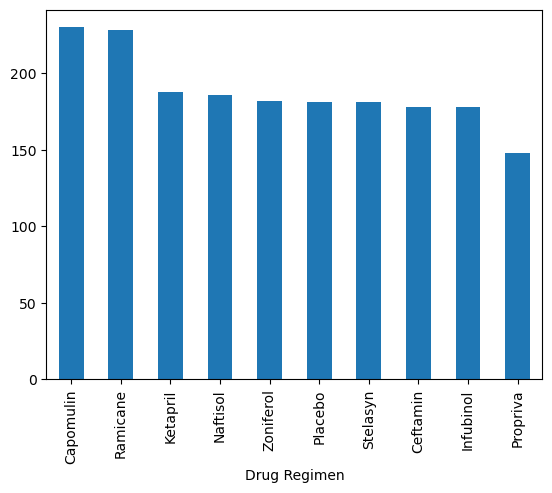

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint = clean_mousestudy_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoint.sort_values(ascending=False).plot.bar()
plt.show()

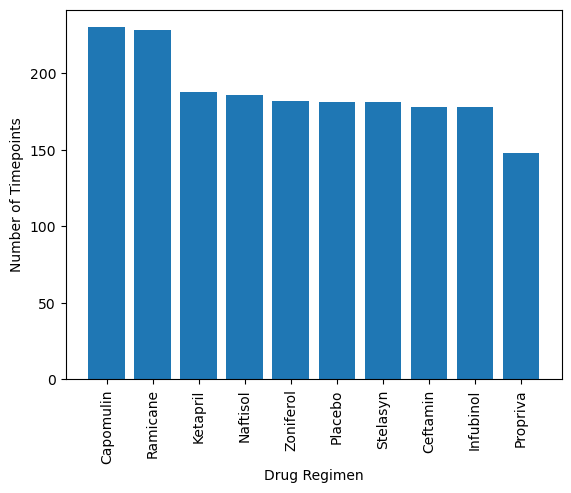

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_pyplot = timepoint.sort_values(ascending=False)
plt.bar(timepoint_pyplot.index, timepoint_pyplot.values)
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 'vertical')
plt.show()


<AxesSubplot:ylabel='Sex'>

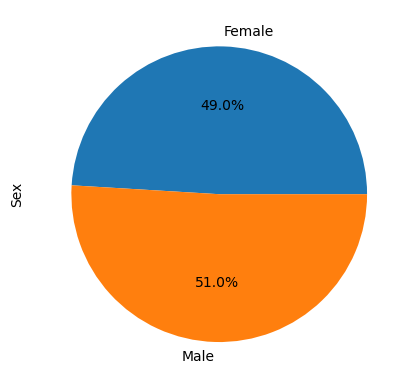

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
m_f_mouse = clean_mousestudy_df.groupby(['Sex'])['Sex'].count()
m_f_mouse.plot.pie(autopct='%1.1f%%')


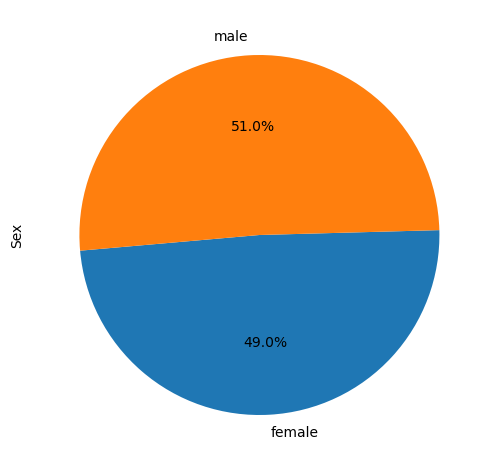

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(m_f_mouse, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
clean_mousestudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_vol = clean_mousestudy_df.groupby(["Mouse ID"])["Timepoint"].max()
last_tumor_vol_df = pd.DataFrame(last_tumor_vol)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_vol_mousestudy_df = pd.merge(clean_mousestudy_df, last_tumor_vol_df, on=("Mouse ID","Timepoint"), how="right")

last_vol_mousestudy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_r = []
ram_r = []
inf_r = []
cef_r = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_vol_mousestudy_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        cap_r.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ramicane":
        ram_r.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Infubinol":
        inf_r.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ceftamin":
        cef_r.append(row["Tumor Volume (mm3)"])
    # add subset 
regimen_df = pd.DataFrame({"Capomulin": cap_r,
                          "Ramicane": ram_r,
                          "Infubinol": inf_r,
                          "Ceftamin": cef_r})
    
regimen_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [17]:
    # Determine outliers using upper and lower bounds
#Capomulin
quart_cap_r = regimen_df[treatments[0]].quantile([.25, .5, .75])
low_cap_r = quart_cap_r[.25]
med_cap_r = quart_cap_r[.5]
up_cap_r = quart_cap_r[.75]
iqr_cap_r = up_cap_r-low_cap_r
lowb_cap_r = low_cap_r - (1.5*iqr_cap_r)
upb_cap_r = up_cap_r + (1.5*iqr_cap_r)
max_cap_r = regimen_df[treatments[0]].max()
min_cap_r = regimen_df[treatments[0]].min()
# Put treatments into a list for for loop (and later for plot labels)

#Ramicane
quart_ram_r = regimen_df[treatments[1]].quantile([.25, .5, .75])
low_ram_r = quart_ram_r[.25]
med_ram_r = quart_ram_r[.5]
up_ram_r = quart_ram_r[.75]
iqr_ram_r = up_ram_r-low_ram_r
lowb_ram_r = low_ram_r - (1.5*iqr_ram_r)
upb_ram_r = up_ram_r + (1.5*iqr_ram_r)
max_ram_r = regimen_df[treatments[1]].max()
min_ram_r = regimen_df[treatments[1]].min()

#Infubinol
quart_inf_r = regimen_df[treatments[2]].quantile([.25, .5, .75])
low_inf_r = quart_inf_r[.25]
med_inf_r = quart_inf_r[.5]
up_inf_r = quart_inf_r[.75]
iqr_inf_r = up_inf_r-low_inf_r
lowb_inf_r = low_inf_r - (1.5*iqr_inf_r)
upb_inf_r = up_inf_r + (1.5*iqr_inf_r)
max_inf_r = regimen_df[treatments[2]].max()
min_inf_r = regimen_df[treatments[2]].min()

#Ceftamin
quart_cef_r = regimen_df[treatments[3]].quantile([.25, .5, .75])
low_cef_r = quart_cef_r[.25]
med_cef_r = quart_cef_r[.5]
up_cef_r = quart_cef_r[.75]
iqr_cef_r = up_cef_r-low_cef_r
lowb_cef_r = low_cef_r - (1.5*iqr_cef_r)
upb_cef_r = up_cef_r + (1.5*iqr_cef_r)
max_cef_r = regimen_df[treatments[3]].max()
min_cef_r = regimen_df[treatments[3]].min()

tumor_outliers_df = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap_r, low_ram_r, low_inf_r, low_cef_r],
                         'Upper Quartile':[up_cap_r, up_ram_r, up_inf_r, up_cef_r],
                         'IQR':[iqr_cap_r, iqr_ram_r, iqr_inf_r, iqr_cef_r],
                         'Median':[med_cap_r, med_ram_r, med_inf_r, med_cef_r],
                        'Upper Bound': [upb_cap_r, upb_ram_r, upb_inf_r, upb_cef_r],
                        'Lower Bound': [lowb_cap_r, lowb_ram_r, lowb_inf_r, lowb_cef_r],
                        'Max': [max_cap_r, max_ram_r, max_inf_r, max_cef_r],
                         'Min': [min_cap_r, min_ram_r, min_inf_r, min_cef_r]
                        })
tumor_outliers_df_type = tumor_outliers_df.groupby("Drug")
tumor_outliers_df_type.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


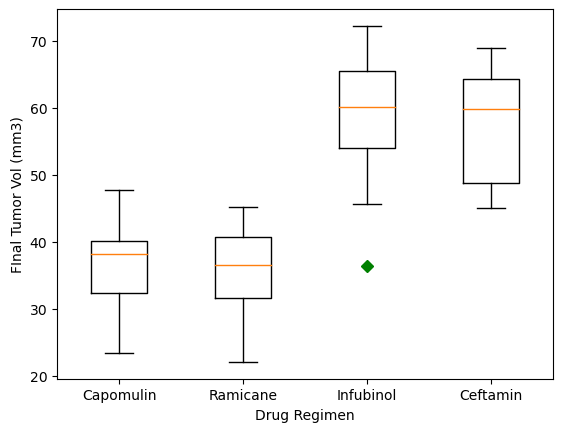

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_boxplot = [regimen_df[treatments[0]],
                regimen_df[treatments[1]],
                regimen_df[treatments[2]],
                regimen_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots()
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('FInal Tumor Vol (mm3)') 
ax.boxplot(tumor_boxplot, 0, 'gD')
plt.xticks([1,2,3,4], treatments) 
plt.savefig('boxplot')
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

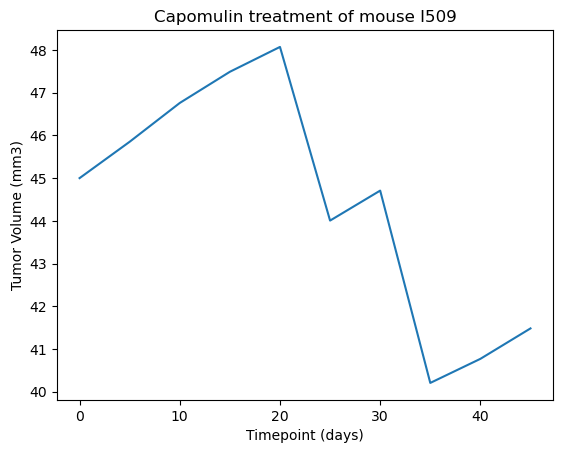

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509_df = clean_mousestudy_df.loc[clean_mousestudy_df["Mouse ID"] == "l509",:]

#l509_df

l509_timepoint = l509_df["Timepoint"]
l509_tumor = l509_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse I509")
plt.plot(l509_timepoint, l509_tumor)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")


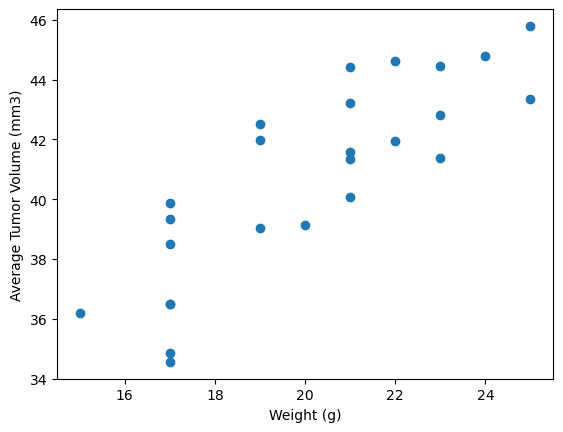

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_r_df = clean_mousestudy_df.loc[clean_mousestudy_df["Drug Regimen"] == "Capomulin",:]
cap_r_df_clean = cap_r_df.groupby(["Mouse ID"]).mean()
#cap_r_df

plt.scatter(cap_r_df_clean["Weight (g)"], cap_r_df_clean["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

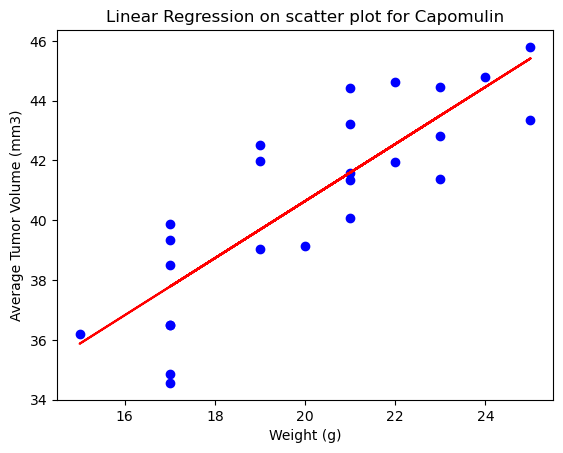

In [26]:
# Calculate the correlation coefficient and linear regression model 

weight = cap_r_df_clean["Weight (g)"]
t_mass = cap_r_df_clean["Tumor Volume (mm3)"]

cap_correlation = round(st.pearsonr(weight, t_mass)[0],2)

model = st.linregress(weight,t_mass)
model
#slope = model[0]
#intercept = model[1]
y_value = model[0] * weight + model[1]

plt.scatter(weight, t_mass, color = "blue")
plt.plot(weight, y_value, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression on scatter plot for Capomulin")
plt.show
